In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Univariate

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [7]:
df.shape

(299, 13)

In [8]:
df.shape[0]

299

In [9]:
df.shape[1]

13

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [14]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [15]:
df['age']

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

C:\Users\khair\AppData\Local\Temp\ipykernel_17256\2953634964.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

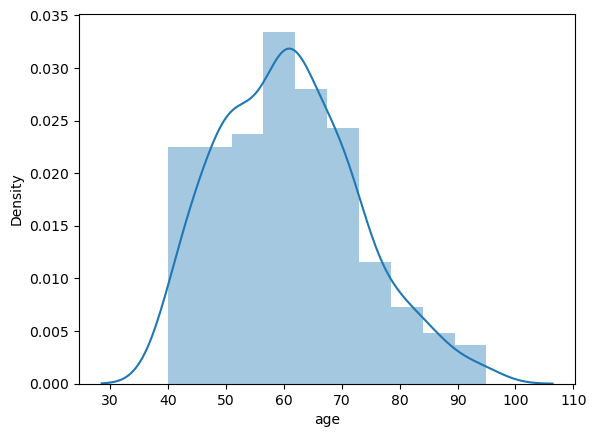

In [16]:
# the age columns is not looking like a Gaussian Distribution
# because all the points is not arround the mean
# also it is somewhat looking like a right side
sns.distplot(df['age'])

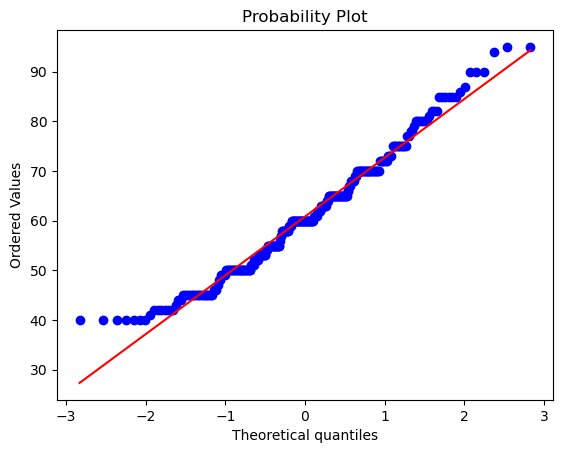

In [17]:
# most of the data points is not lies on the straight line 
# so we cant say it is not a Gaussian distribution
stats.probplot(df['age'], dist = 'norm', plot = plt)
plt.show()

<Axes: ylabel='age'>

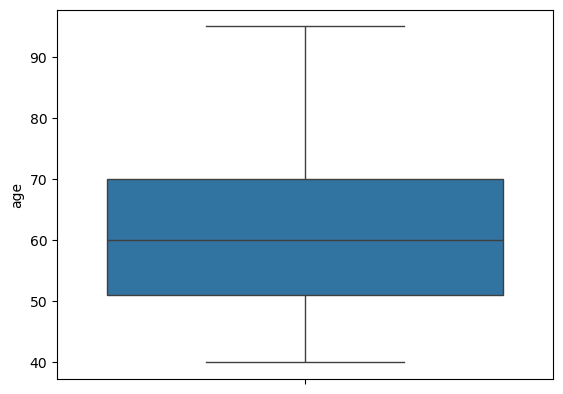

In [18]:
# there is no outliers present in the age column
# both the whiskers length is not a same
sns.boxplot(df['age'])

In [19]:
# skewness of age column is 0.42 so we can say that it is somewhat right skewed
stats.skew(df['age'])

np.float64(0.4209365580238486)

In [20]:
# kurtosis of age column is -0.20 so we can say that it is somewhat flatter distribution
stats.kurtosis(df['age'])

np.float64(-0.20179349222768916)

In [21]:
df['age'].mean()

np.float64(60.83389297658862)

In [22]:
df['age'].median()

60.0

In [8]:
# on the age column we applied the chebysheve's and equality theorem 
# 75% data is lies within 2+- std deviation and 88.89% data is lies within 3+= std deviation

In [29]:
mean = np.mean(df['age'])
std = np.std(df['age'])
# k = 2
k2 = 1 - (1 / 2 ** 2)
# k = 3
k3 = 1 - (1 / 3 ** 2)
lower_2 = mean - 2 * std
upper_2 = mean + 2 * std
lower_3 = mean - 3 * std
upper_3 = mean + 3 * std
range_2 = ((df['age'] >= lower_2) & (df['age'] <= upper_2)).mean()
range_3 = ((df['age'] >= lower_3) & (df['age'] <= upper_3)).mean()

In [17]:
std = np.std(df['age'])

In [18]:
# k = 2
k2 = 1 - (1 / 2 ** 2)

In [27]:
k2

0.75

In [28]:
k3

0.8888888888888888

In [20]:
# k = 3
k3 = 1 - (1 / 3 ** 2)

In [21]:
lower_2 = mean - 2 * std
upper_2 = mean + 2 * std

In [22]:
lower_3 = mean - 3 * std
upper_3 = mean + 3 * std

In [24]:
range_2 = ((df['age'] >= lower_2) & (df['age'] <= upper_2)).mean()
range_3 = ((df['age'] >= lower_3) & (df['age'] <= upper_3)).mean()

In [25]:
range_2

np.float64(0.9531772575250836)

In [26]:
range_3

np.float64(1.0)

In [11]:
k2

0.75

In [12]:
k3

0.8888888888888888

In [23]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [24]:
df['anaemia']

0      0
1      0
2      0
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: anaemia, Length: 299, dtype: int64

In [25]:
df['anaemia'].unique()

array([0, 1])

In [26]:
df['anaemia'].value_counts()

anaemia
0    170
1    129
Name: count, dtype: int64

<Axes: xlabel='anaemia'>

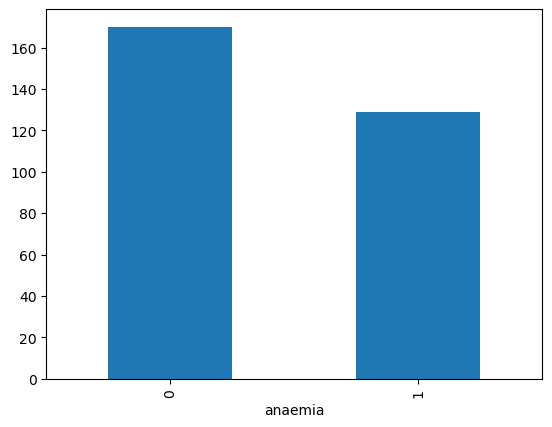

In [27]:
# anaemia
# 0    170
# 1    129
df['anaemia'].value_counts().plot(kind = 'bar')

In [28]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [29]:
df['creatinine_phosphokinase']

0       582
1      7861
2       146
3       111
4       160
       ... 
294      61
295    1820
296    2060
297    2413
298     196
Name: creatinine_phosphokinase, Length: 299, dtype: int64

C:\Users\khair\AppData\Local\Temp\ipykernel_17256\444980006.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['creatinine_phosphokinase'])


<Axes: xlabel='creatinine_phosphokinase', ylabel='Density'>

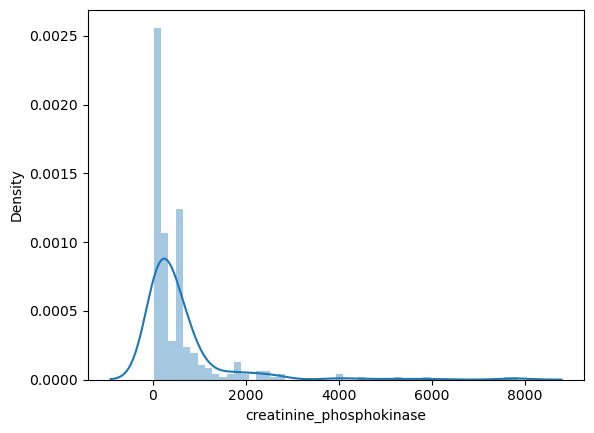

In [30]:
# it is clearly showing the 'creatinine_phosphokinase' column is not a gaussian distribution
# it is showing the column is mostly the right skew
sns.distplot(df['creatinine_phosphokinase'])

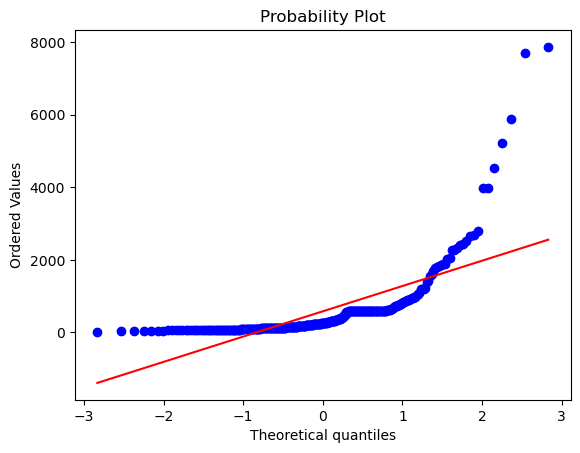

In [31]:
# lots of point is not lieing on the straight line
# so we cannot say the column is gaussian distributed
# lots of points goes outside the straight line so we can say that 
# lots of outliers presents in this column
stats.probplot(df['creatinine_phosphokinase'], dist = 'norm', plot = plt)
plt.show()

In [32]:
# skewness is 4.44 so we can strongly say it is a right skewed
stats.skew(df['creatinine_phosphokinase'])

np.float64(4.440688625555512)

In [33]:
# kurtosis is 24.71 we can say it is a heavy tail
stats.kurtosis(df['creatinine_phosphokinase'])

np.float64(24.71045804512093)

<Axes: ylabel='creatinine_phosphokinase'>

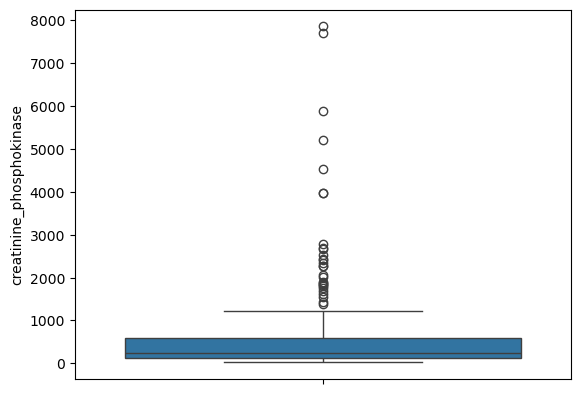

In [34]:
# lots of outliers presents in this column
sns.boxplot(df['creatinine_phosphokinase'])

In [ ]:
# on the creatinine_phosphokinase column we applied apply chebyaheves and equality theorem
# so according to the chebyaheves & equality theorem 75% data is lies within 2+- of STD
# 88.89% data is lies within the 3+- range of STD

In [30]:
mean = np.mean(df['creatinine_phosphokinase'])
std = np.std(df['creatinine_phosphokinase'])
# k = 2
k2 = 1 - (1 / 2 ** 2)
# k = 3
k3 = 1 - (1 / 3 ** 2)
lower_2 = mean - 2 * std
upper_2 = mean + 2 * std
lower_3 = mean - 3 * std
upper_3 = mean + 3 * std
range_2 = ((df['creatinine_phosphokinase'] >= lower_2) & (df['creatinine_phosphokinase'] <= upper_2)).mean()
range_3 = ((df['creatinine_phosphokinase'] >= lower_3) & (df['creatinine_phosphokinase'] <= upper_3)).mean()

In [31]:
range_2

np.float64(0.9632107023411371)

In [32]:
range_3

np.float64(0.9765886287625418)

In [35]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [36]:
df['diabetes']

0      0
1      0
2      0
3      0
4      1
      ..
294    1
295    0
296    1
297    0
298    0
Name: diabetes, Length: 299, dtype: int64

In [37]:
df['diabetes'].value_counts()

diabetes
0    174
1    125
Name: count, dtype: int64

<Axes: xlabel='diabetes'>

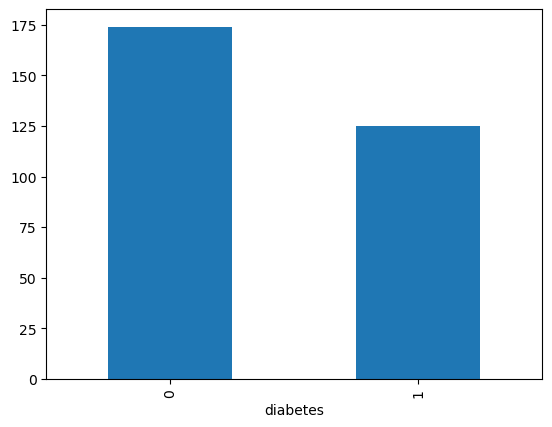

In [38]:
# diabetes
# 0    174
# 1    125
df['diabetes'].value_counts().plot(kind = 'bar') 

In [39]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [40]:
df['ejection_fraction']

0      20
1      38
2      20
3      20
4      20
       ..
294    38
295    38
296    60
297    38
298    45
Name: ejection_fraction, Length: 299, dtype: int64

C:\Users\khair\AppData\Local\Temp\ipykernel_17256\3737558099.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ejection_fraction'])


<Axes: xlabel='ejection_fraction', ylabel='Density'>

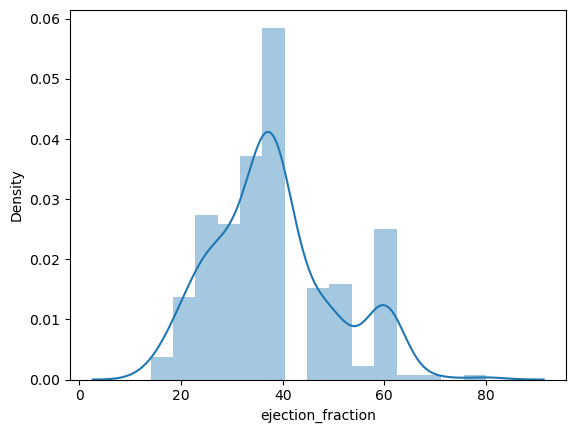

In [41]:
# the ejection_fraction is not looking like a gaussian distribution 
# lots of points is not lieing towards the mean
sns.distplot(df['ejection_fraction'])

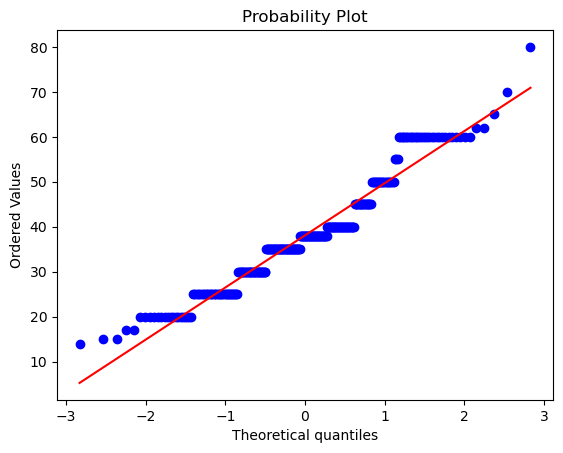

In [42]:
# all the points in ejection fraction is not lieing on the straight line 
# so we cannot say it is a gaussian distribution
stats.probplot(df['ejection_fraction'], dist = 'norm', plot = plt)
plt.show()

In [43]:
# skewness is 0.55 so it is a right skewed graph probably
stats.skew(df['ejection_fraction'])

np.float64(0.5525926588215331)

In [44]:
# kurtosis 0.020 the ejection fraction having somewhat a heavy tail
# but still we can't say it is gaussian distribution
stats.kurtosis(df['ejection_fraction'])

np.float64(0.020720130206288268)

<Axes: ylabel='ejection_fraction'>

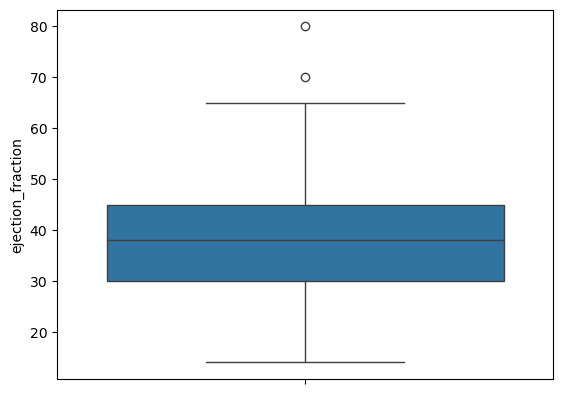

In [45]:
# in this column only 2 outliers is present
sns.boxplot(df['ejection_fraction'])

In [ ]:
# on the ejection_fraction column we applied apply chebyaheves and equality theorem
# so according to the chebyaheves & equality theorem 75% data is lies within 2+- of STD
# 88.89% data is lies within the 3+- range of STD

In [35]:
mean = np.mean(df['ejection_fraction'])
std = np.std(df['ejection_fraction'])
# k = 2
k2 = 1 - (1 / 2 ** 2)
# k = 3
k3 = 1 - (1 / 3 ** 2)
lower_2 = mean - 2 * std
upper_2 = mean + 2 * std
lower_3 = mean - 3 * std
upper_3 = mean + 3 * std
range_2 = ((df['ejection_fraction'] >= lower_2) & (df['ejection_fraction'] <= upper_2)).mean()
range_3 = ((df['ejection_fraction'] >= lower_3) & (df['ejection_fraction'] <= upper_3)).mean()

In [36]:
range_2

np.float64(0.979933110367893)

In [37]:
range_3

np.float64(0.9966555183946488)

In [46]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [47]:
df['high_blood_pressure']

0      1
1      0
2      0
3      0
4      0
      ..
294    1
295    0
296    0
297    0
298    0
Name: high_blood_pressure, Length: 299, dtype: int64

In [48]:
df['high_blood_pressure'].value_counts()

high_blood_pressure
0    194
1    105
Name: count, dtype: int64

<Axes: xlabel='high_blood_pressure'>

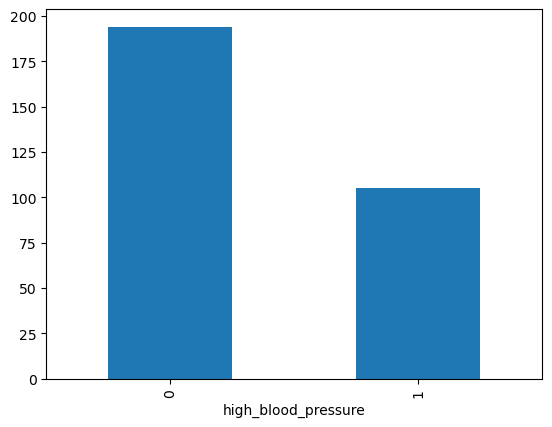

In [49]:
# high_blood_pressure
# 0    194
# 1    105
df['high_blood_pressure'].value_counts().plot(kind = 'bar')

In [50]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [51]:
df['platelets']

0      265000.00
1      263358.03
2      162000.00
3      210000.00
4      327000.00
         ...    
294    155000.00
295    270000.00
296    742000.00
297    140000.00
298    395000.00
Name: platelets, Length: 299, dtype: float64

C:\Users\khair\AppData\Local\Temp\ipykernel_17256\3247845032.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['platelets'])


<Axes: xlabel='platelets', ylabel='Density'>

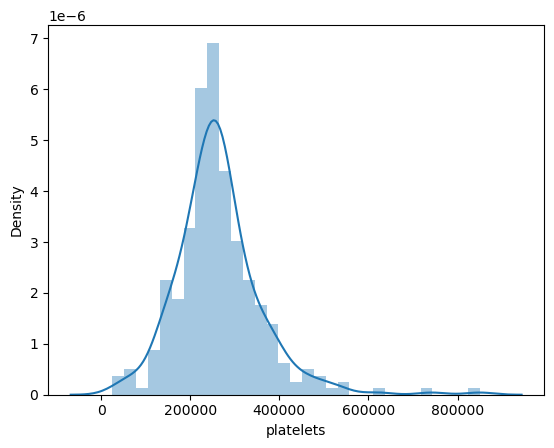

In [52]:
# the platelets column is not a gaussian distributed column 
# because the column is somewhat right skewed
sns.distplot(df['platelets'])

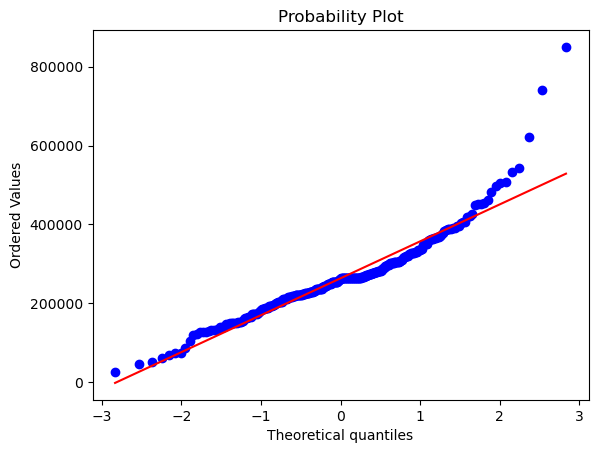

In [53]:
# all the points in platelets is not lieing on the straight line 
# also some outliers present in this column
# so we cannot say it is a gaussian distribution
stats.probplot(df['platelets'], dist = 'norm', plot = plt)
plt.show()

In [54]:
# we can strongly say it is right skewed deviation because most of the point is lieing on the right side
# because skew 1.45
# so it is not a gaussian distribution
stats.skew(df['platelets'])

np.float64(1.4549745335147466)

In [55]:
# we can strongly say it is heavy tail distribution 
# because kurtosis 6.08
# so it is not a gaussian distribution
stats.kurtosis(df['platelets'])

np.float64(6.085905849544158)

<Axes: ylabel='platelets'>

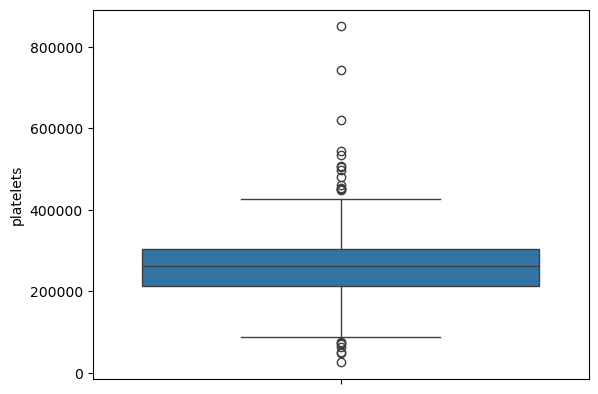

In [56]:
# so many outliers is present in this column
sns.boxplot(df['platelets'])

In [40]:
# on the platelets column we applied apply chebyaheves and equality theorem
# so according to the chebyaheves & equality theorem 75% data is lies within 2+- of STD
# 88.89% data is lies within the 3+- range of STD

In [ ]:
mean = np.mean(df['platelets'])
std = np.std(df['platelets'])
# k = 2
k2 = 1 - (1 / 2 ** 2)
# k = 3
k3 = 1 - (1 / 3 ** 2)
lower_2 = mean - 2 * std
upper_2 = mean + 2 * std
lower_3 = mean - 3 * std
upper_3 = mean + 3 * std
range_2 = ((df['platelets'] >= lower_2) & (df['platelets'] <= upper_2)).mean()
range_3 = ((df['platelets'] >= lower_3) & (df['platelets'] <= upper_3)).mean()

In [38]:
range_2

np.float64(0.979933110367893)

In [39]:
range_3

np.float64(0.9966555183946488)

In [57]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [58]:
df['serum_creatinine']

0      1.9
1      1.1
2      1.3
3      1.9
4      2.7
      ... 
294    1.1
295    1.2
296    0.8
297    1.4
298    1.6
Name: serum_creatinine, Length: 299, dtype: float64

C:\Users\khair\AppData\Local\Temp\ipykernel_17256\2425361590.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['serum_creatinine'])


<Axes: xlabel='serum_creatinine', ylabel='Density'>

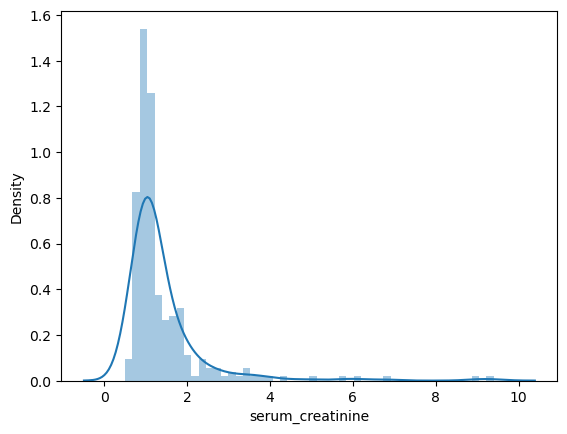

In [59]:
# the distribution is not a gaussian distribution because most of the point is not towards the mean
# the column is having most of right skewed
sns.distplot(df['serum_creatinine'])

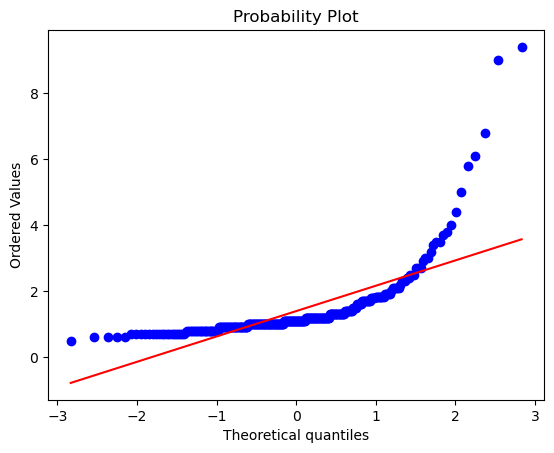

In [41]:
# most of the points in the serum_creatinine are not lieing on the straight line it is far away 
# it is having the outliers
# and also the distribution is not a gaussian distribution
stats.probplot(df['serum_creatinine'], dist = 'norm', plot = plt)
plt.show()

In [42]:
# skewness 4.43 so the column is having the right skewed
stats.skew(df['serum_creatinine'])

np.float64(4.433610162782361)

In [43]:
# kurtosis 25.37 so the columns is having the heavy tail
stats.kurtosis(df['serum_creatinine'])

np.float64(25.378345829725248)

<Axes: ylabel='serum_creatinine'>

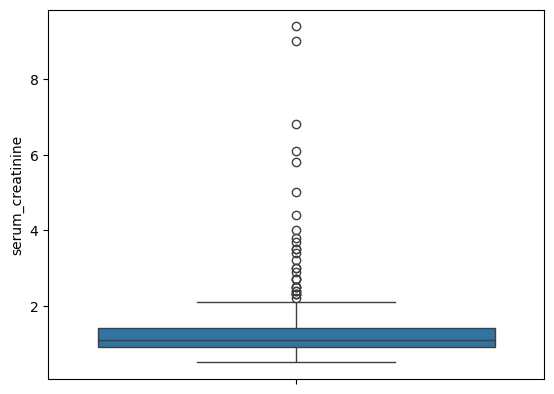

In [44]:
# there are too many outliers present in this column
sns.boxplot(df['serum_creatinine'])

In [ ]:
# on the serum_creatinine column we applied apply chebyaheves and equality theorem
# so according to the chebyaheves & equality theorem 75% data is lies within 2+- of STD
# 88.89% data is lies within the 3+- range of STD

In [ ]:
mean = np.mean(df['serum_creatinine'])
std = np.std(df['serum_creatinine'])
# k = 2
k2 = 1 - (1 / 2 ** 2)
# k = 3
k3 = 1 - (1 / 3 ** 2)
lower_2 = mean - 2 * std
upper_2 = mean + 2 * std
lower_3 = mean - 3 * std
upper_3 = mean + 3 * std
range_2 = ((df['serum_creatinine'] >= lower_2) & (df['serum_creatinine'] <= upper_2)).mean()
range_3 = ((df['serum_creatinine'] >= lower_3) & (df['serum_creatinine'] <= upper_3)).mean()

In [45]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [46]:
df['serum_sodium']

0      130
1      136
2      129
3      137
4      116
      ... 
294    143
295    139
296    138
297    140
298    136
Name: serum_sodium, Length: 299, dtype: int64

C:\Users\khair\AppData\Local\Temp\ipykernel_384\2237691630.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['serum_sodium'])


<Axes: xlabel='serum_sodium', ylabel='Density'>

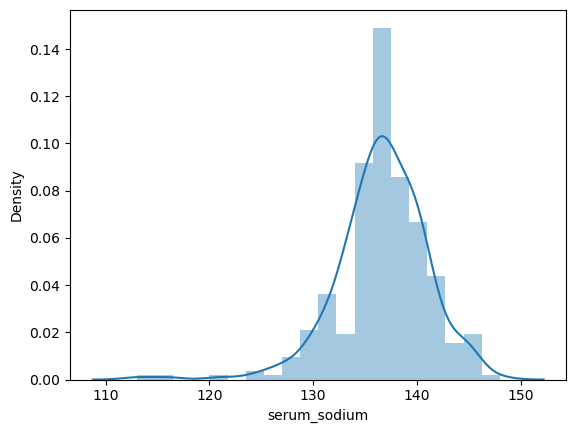

In [48]:
# the distribution is not a gaussian distribution because most of the point is not towards the mean
# the column is having most of left skewed
# also the distribution is not a bell shaped curve
sns.distplot(df['serum_sodium'])

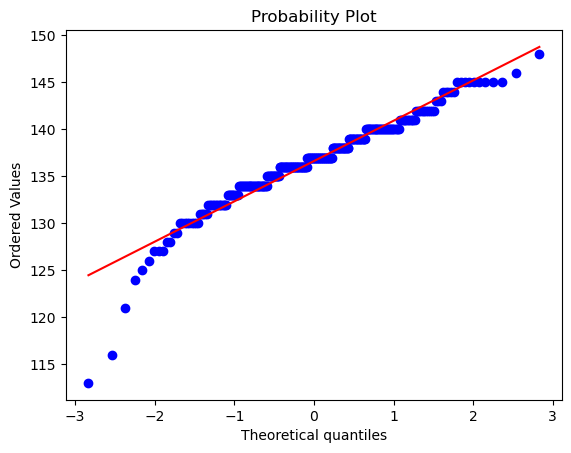

In [49]:
# most of the points in the serum_sodium are not lieing on the straight line it is far away 
# it is having the outliers
# and also the distribution is not a gaussian distribution
stats.probplot(df['serum_sodium'], dist = 'norm', plot = plt)
plt.show()

In [51]:
# skewness -1.04 so the column is having the left skewed
stats.skew(df['serum_sodium'])

np.float64(-1.04287046392733)

In [53]:
# kurtosis 4.03 so the columns is having the heavy tail
stats.kurtosis(df['serum_sodium'])

np.float64(4.0311423044101415)

In [54]:
# on the serum_sodium column we applied apply chebyaheves and equality theorem
# so according to the chebyaheves & equality theorem 75% data is lies within 2+- of STD
# 88.89% data is lies within the 3+- range of STD

In [55]:
mean = np.mean(df['serum_sodium'])
std = np.std(df['serum_sodium'])
# k = 2
k2 = 1 - (1 / 2 ** 2)
# k = 3
k3 = 1 - (1 / 3 ** 2)
lower_2 = mean - 2 * std
upper_2 = mean + 2 * std
lower_3 = mean - 3 * std
upper_3 = mean + 3 * std
range_2 = ((df['serum_sodium'] >= lower_2) & (df['serum_sodium'] <= upper_2)).mean()
range_3 = ((df['serum_sodium'] >= lower_3) & (df['serum_sodium'] <= upper_3)).mean()

In [56]:
range_2

np.float64(0.9632107023411371)

In [57]:
range_3

np.float64(0.9899665551839465)

In [58]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [59]:
df['sex']

0      1
1      1
2      1
3      1
4      0
      ..
294    1
295    0
296    0
297    1
298    1
Name: sex, Length: 299, dtype: int64

In [61]:
df['sex'].value_counts()

sex
1    194
0    105
Name: count, dtype: int64

<Axes: xlabel='sex'>

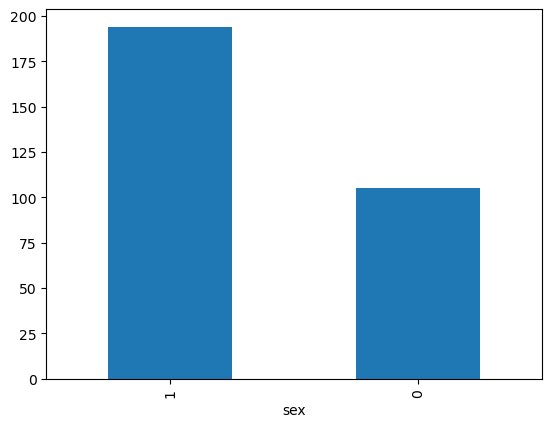

In [62]:
# sex
# 1    194
# 0    105
df['sex'].value_counts().plot(kind = 'bar')

In [63]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [64]:
df['smoking']

0      0
1      0
2      1
3      0
4      0
      ..
294    1
295    0
296    0
297    1
298    1
Name: smoking, Length: 299, dtype: int64

In [65]:
df['smoking'].value_counts()

smoking
0    203
1     96
Name: count, dtype: int64

<Axes: xlabel='smoking'>

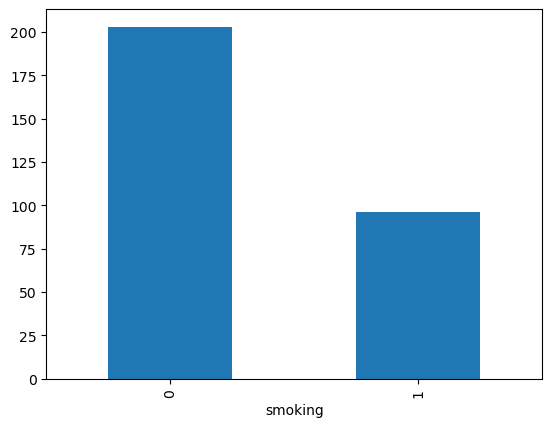

In [66]:
# smoking
# 0    203
# 1     96
df['smoking'].value_counts().plot(kind = 'bar')

In [67]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [68]:
df['time']

0        4
1        6
2        7
3        7
4        8
      ... 
294    270
295    271
296    278
297    280
298    285
Name: time, Length: 299, dtype: int64

C:\Users\khair\AppData\Local\Temp\ipykernel_384\1937289982.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['time'])


<Axes: xlabel='time', ylabel='Density'>

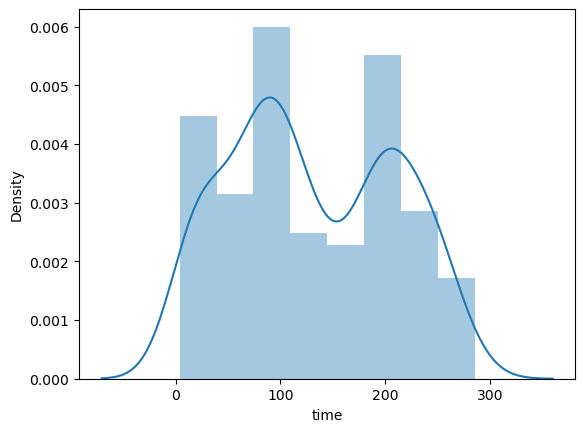

In [69]:
# the distribution is not a gaussian distribution because most of the point is not towards the mean
# also the distribution is not a bell shaped curve
sns.distplot(df['time'])

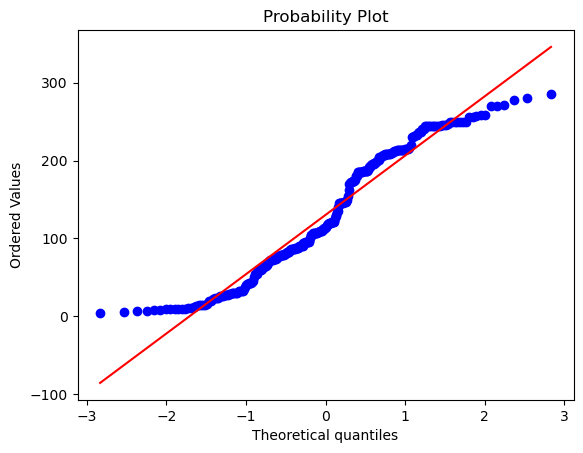

In [70]:
# most of the points in the serum_sodium are not lieing on the straight line it is far away 
# it is having tsome outliers
# and also the distribution is not a gaussian distribution
stats.probplot(df['time'], dist = 'norm', plot = plt)
plt.show()

In [71]:
# in the time column skew 0.127 so probably it will be somewhat right_skewed
stats.skew(df['time'])

np.float64(0.12716059964019436)

In [72]:
# kurtosis -1.21 it will be the flatter distribution
stats.kurtosis(df['time'])

np.float64(-1.2118742823987763)

In [73]:
# on the time column we applied apply chebyaheves and equality theorem
# so according to the chebyaheves & equality theorem 75% data is lies within 2+- of STD
# 88.89% data is lies within the 3+- range of STD

In [74]:
mean = np.mean(df['time'])
std = np.std(df['time'])
# k = 2
k2 = 1 - (1 / 2 ** 2)
# k = 3
k3 = 1 - (1 / 3 ** 2)
lower_2 = mean - 2 * std
upper_2 = mean + 2 * std
lower_3 = mean - 3 * std
upper_3 = mean + 3 * std
range_2 = ((df['time'] >= lower_2) & (df['time'] <= upper_2)).mean()
range_3 = ((df['time'] >= lower_3) & (df['time'] <= upper_3)).mean()

In [75]:
range_2

np.float64(1.0)

In [76]:
range_3

np.float64(1.0)

<Axes: ylabel='time'>

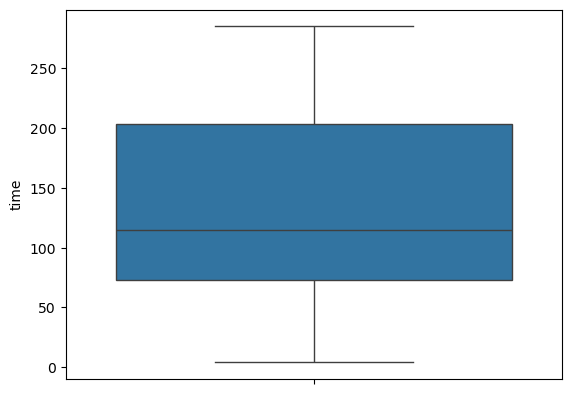

In [77]:
# there is no outliers present in the time column
# both whiskers of the boxplot are equally kikely
sns.boxplot(df['time'])

In [78]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [79]:
df['DEATH_EVENT']

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [81]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<Axes: xlabel='DEATH_EVENT'>

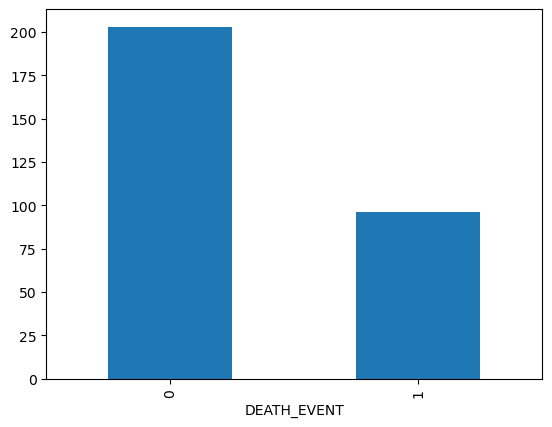

In [80]:
# DEATH_EVENT
# 0    203
# 1     96
df['DEATH_EVENT'].value_counts().plot(kind = 'bar')

# Bivariate

In [82]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

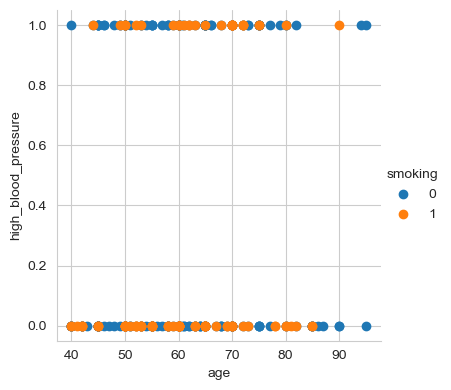

In [84]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'smoking', height = 4).map(plt.scatter, 'age', 'high_blood_pressure').add_legend()
plt.show() 

In [87]:
df.groupby('sex')['smoking'].value_counts()

sex  smoking
0    0          101
     1            4
1    0          102
     1           92
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

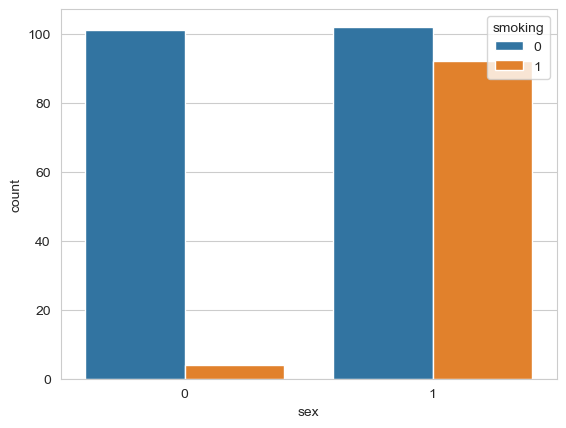

In [85]:
# from the sex and smoking column
# we can say than mens are having more smoking habit as compare to the womens
# sex  smoking
0    0          101
     1            4
1    0          102
     1           92
sns.countplot(x='sex', hue='smoking', data=df)

In [89]:
df.groupby('sex')['high_blood_pressure'].value_counts()

sex  high_blood_pressure
0    0                       61
     1                       44
1    0                      133
     1                       61
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

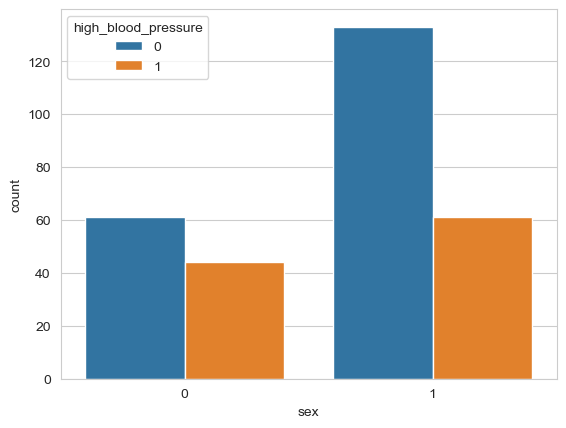

In [88]:
#sex  high_blood_pressure
0    0                       61
     1                       44
1    0                      133
     1                       61
# 
sns.countplot(x='sex', hue='high_blood_pressure', data=df)

In [91]:
df['age'].unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

In [92]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [96]:
df.groupby('sex')['diabetes'].value_counts()

sex  diabetes
0    1            55
     0            50
1    0           124
     1            70
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

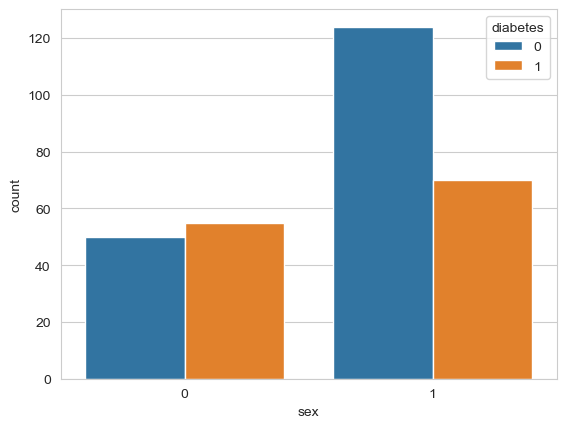

In [95]:
#sex  diabetes
0    1            55
     0            50
1    0           124
     1            70
sns.countplot(x='sex', hue='diabetes', data=df)

In [97]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

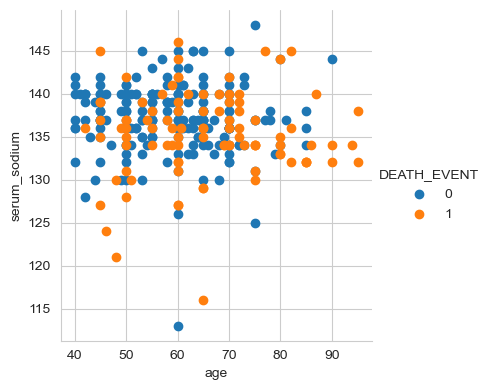

In [102]:
# most of the peoples dies whose age is 41 and his sodium in their body is greater than 130 
# peoples also present whose sodium > 130 but they are not die
# there is a high chance of death whose sodium > 130 and age is between 45 to 90
# there is a very rare case of death whose sodium < 120
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'DEATH_EVENT', height = 4).map(plt.scatter, 'age', 'serum_sodium').add_legend()
plt.show() 

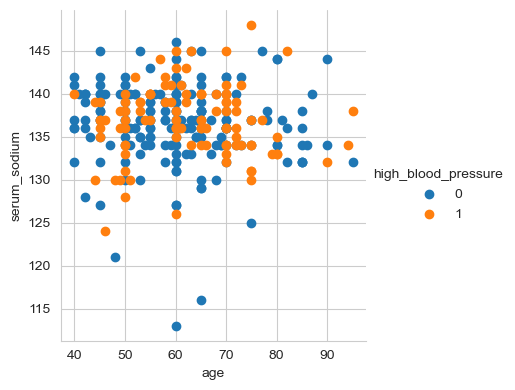

In [104]:
# the people whose age > 45 & sodium > 130 then there is a high chance of High BP
# but there were people also present who have a sodium > 130 but did not have high BP
# people who sodium < 125 they have a high chance they did not have a high BP
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'high_blood_pressure', height = 4).map(plt.scatter, 'age', 'serum_sodium').add_legend()
plt.show()

In [105]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

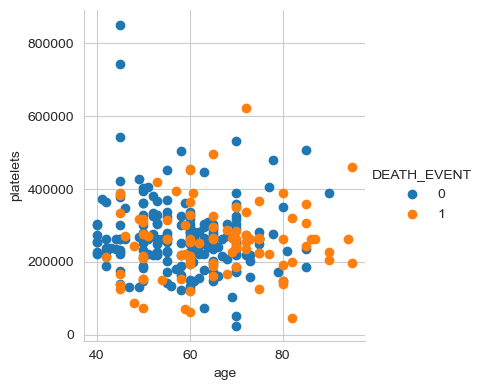

In [106]:
# if your platelets > 500000 then you are not in danger_zone
# if platelets is between 170000 to 450000 and the age between 40 to 60 then 50-50 chance of death & survive 
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'DEATH_EVENT', height = 4).map(plt.scatter, 'age', 'platelets').add_legend()
plt.show()

<Axes: xlabel='sex', ylabel='serum_creatinine'>

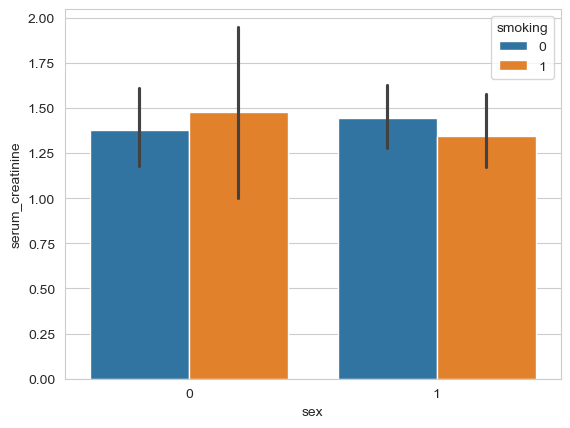

In [112]:
sns.barplot(x='sex', y='serum_creatinine', hue='smoking', data=df, estimator='mean')

<Axes: xlabel='sex', ylabel='platelets'>

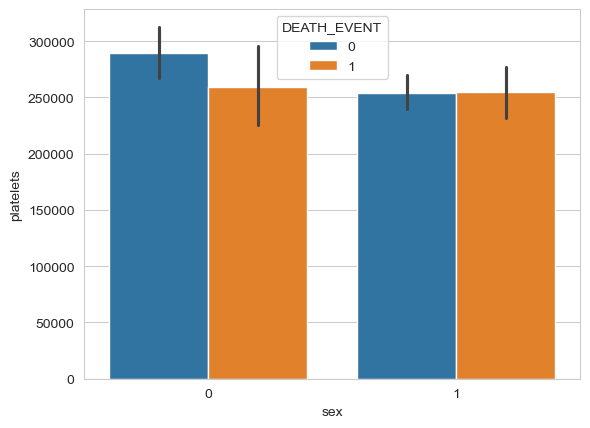

In [114]:
sns.barplot(x='sex', y='platelets', hue='DEATH_EVENT', data=df, estimator='mean')

In [115]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<Axes: xlabel='sex', ylabel='serum_creatinine'>

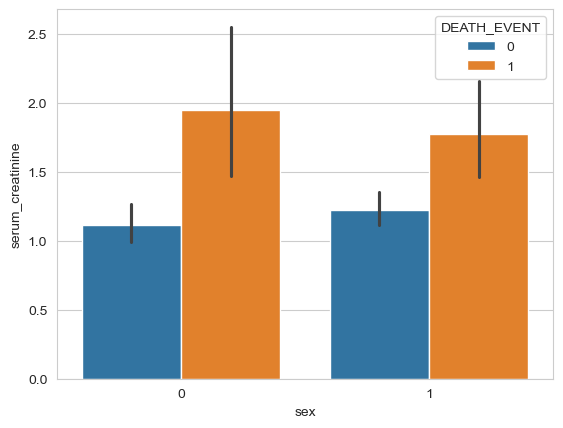

In [116]:
# because of the poor kidney function 
sns.barplot(x='sex', y='serum_creatinine', hue='DEATH_EVENT', data=df, estimator='mean')

In [ ]:
# 34 female death because of the serum_creatinine

In [120]:
df['serum_creatinine'][(df['sex'] == 0) & (df['DEATH_EVENT'])].shape[0]

34

In [122]:
# 62 male death because of the serum_creatinine

In [121]:
df['serum_creatinine'][(df['sex'] == 1) & (df['DEATH_EVENT'])].shape[0]

62

# Multivariate

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


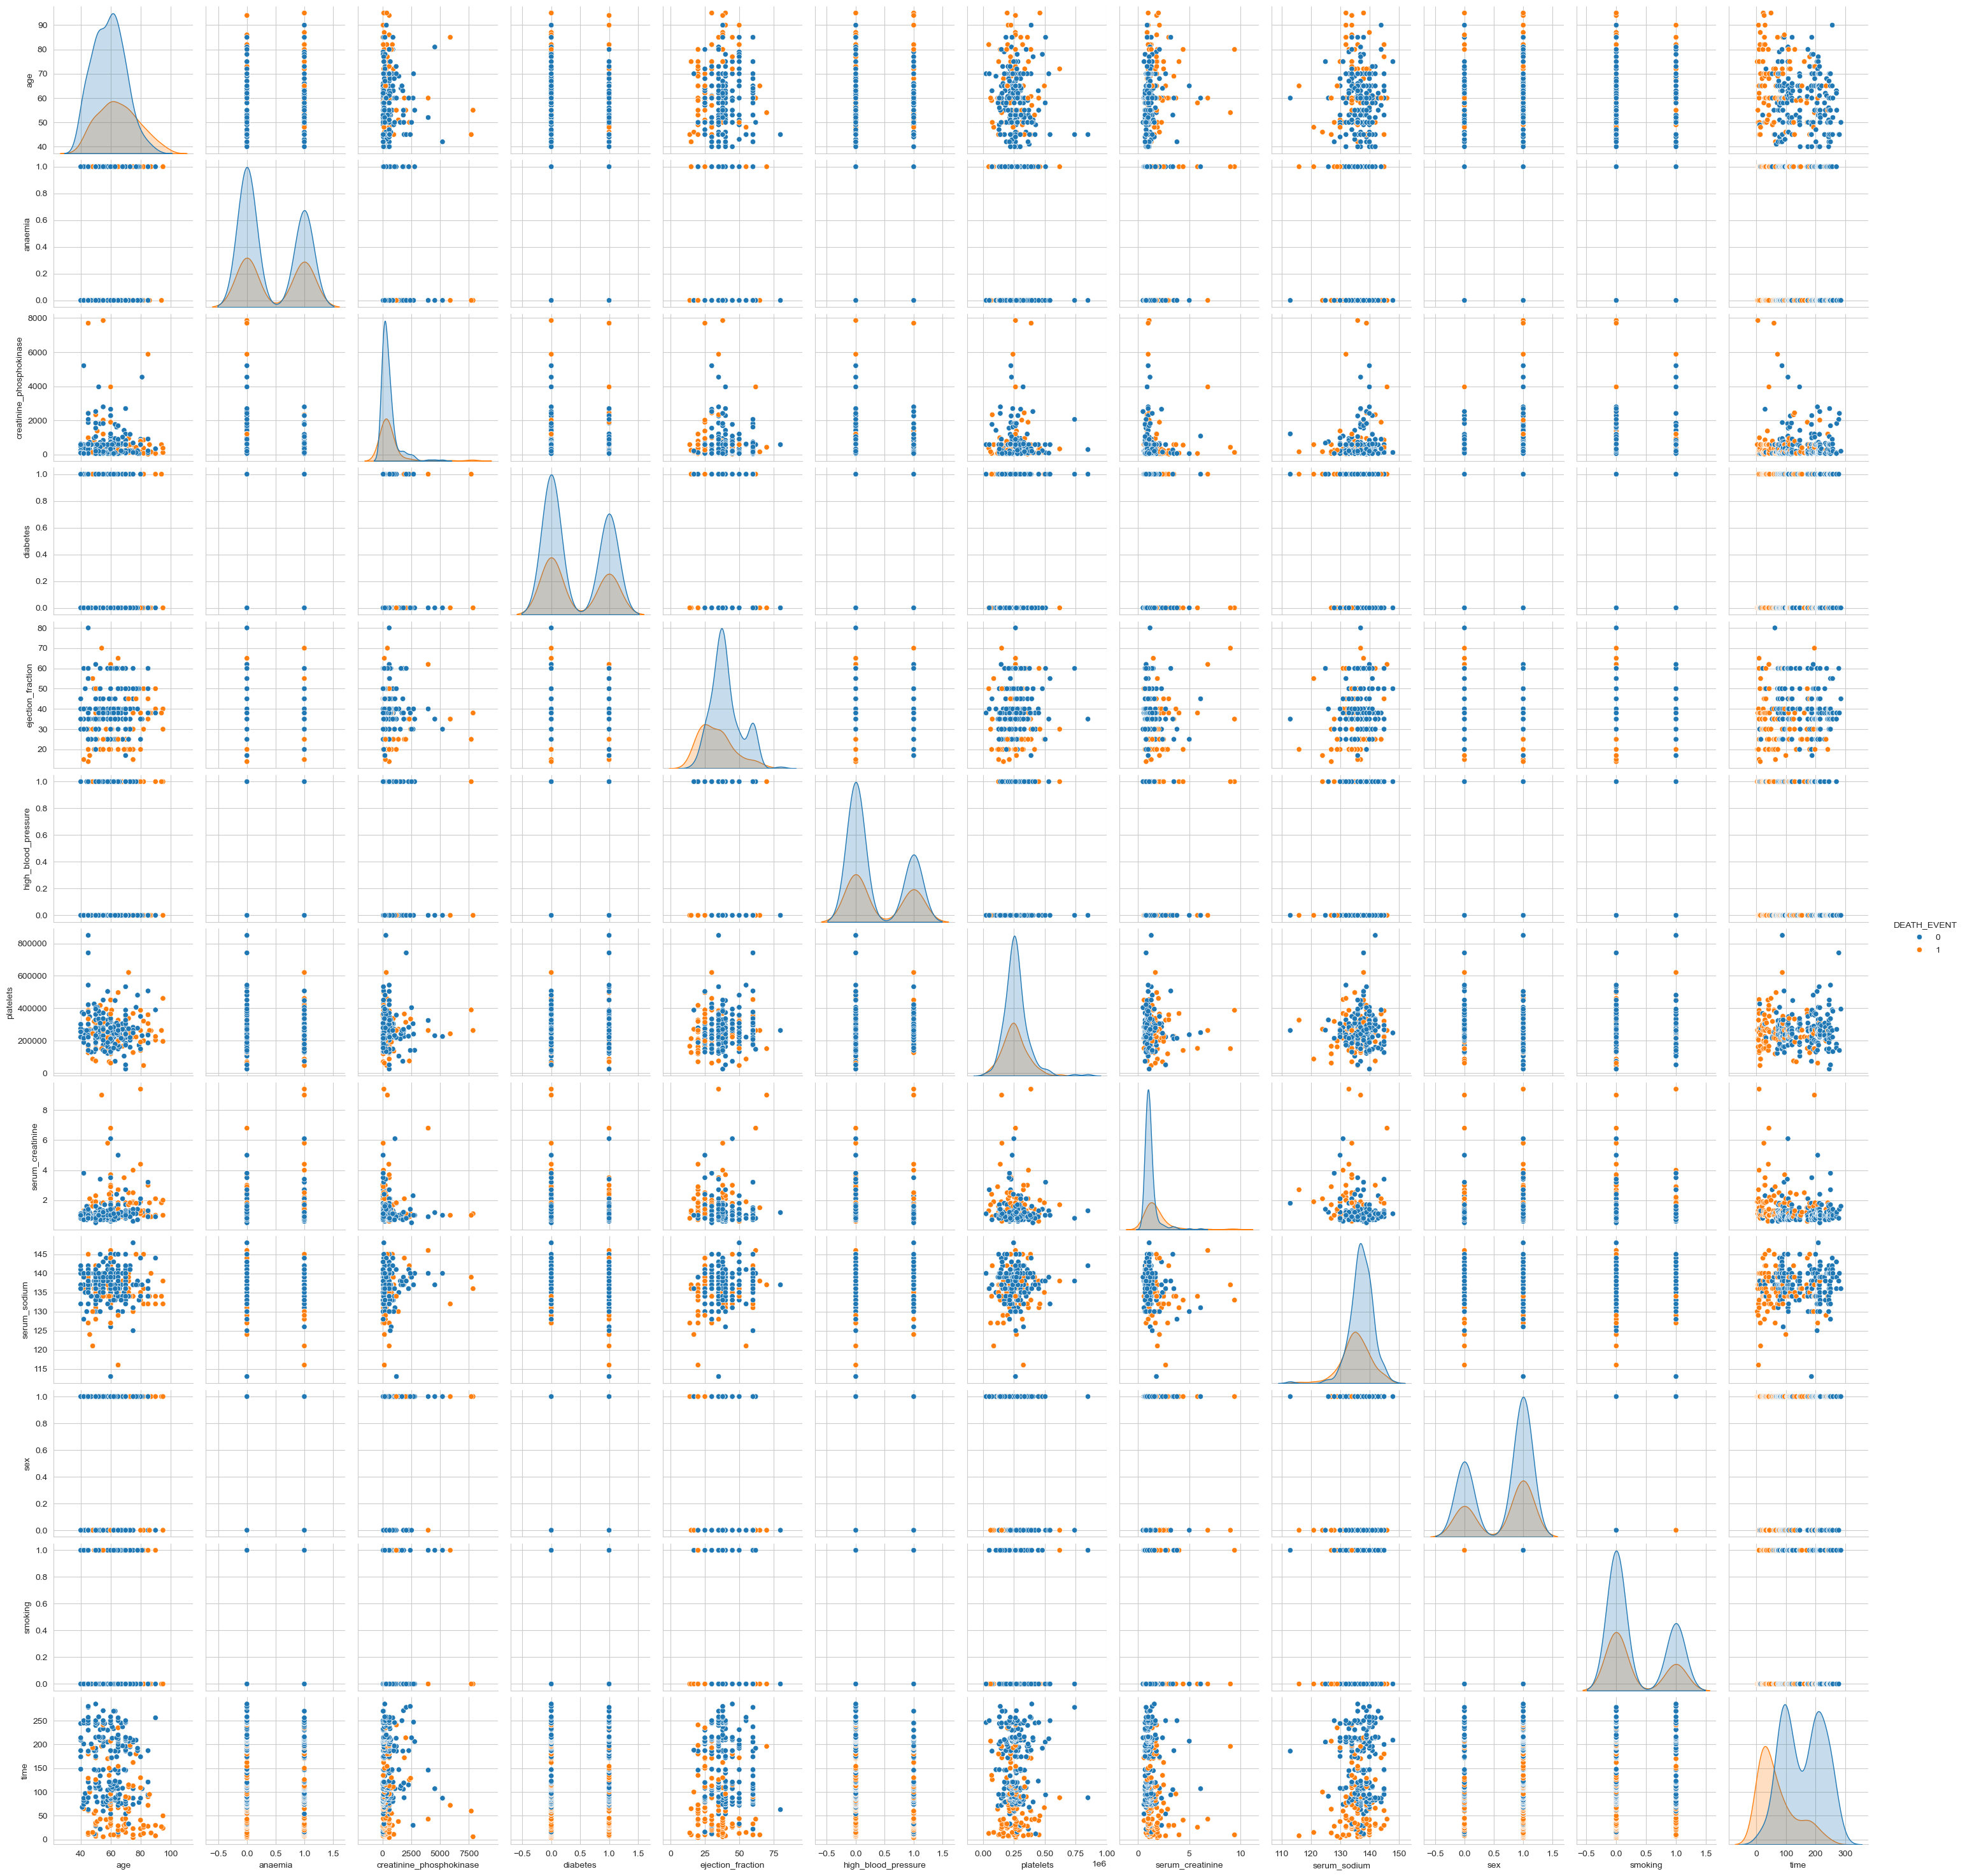

In [124]:
sns.pairplot(df, hue = 'DEATH_EVENT')
plt.show() 

<Axes: >

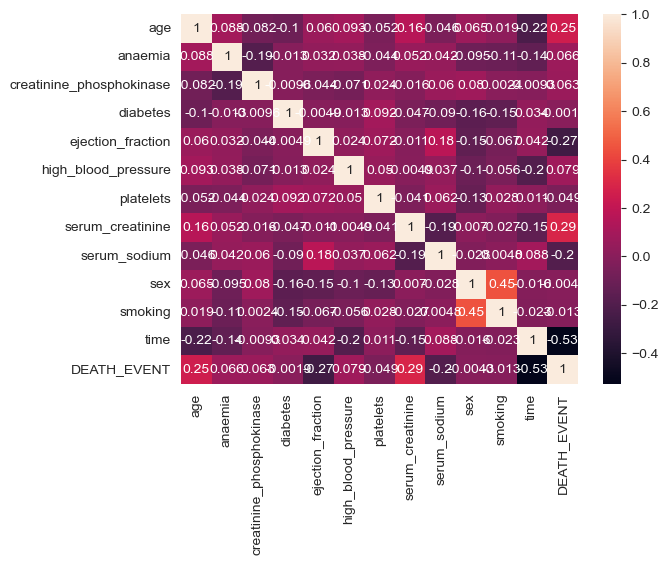

In [125]:
sns.heatmap(df.corr(), annot = True)